<a href="https://colab.research.google.com/github/robertopaulo/CienciaDeDados/blob/main/Abalone_Regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuração e Exploração Inicial

In [ ]:
from google.colab import files

# Fazer upload do arquivo do seu computador
uploaded = files.upload()

Saving abalone.csv to abalone.csv


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Carregar o conjunto de dados
df = pd.read_csv('abalone.csv') #Arquivo já Tem cabeçalho



Exploração inicial dos dados

In [49]:
print(df.shape)    # dimensões do DataFrame
print(df.info())   # tipos de cada coluna e contagem de não-nulos
print(df.describe())  # estatísticas básicas dos atributos numéricos


(4177, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None
            Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min     

**Percebemos que:**
- (4177, 9) → 4 177 instâncias (linhas) e 9 variáveis (colunas).

- 100% não‑nulos, não há valores ausentes.

Tipos:
- Sex → object (categórica)
- 7 medidas físicas → float64
- Rings → int64 (numérico inteiro).


In [50]:
print(df.head())          # as 5 primeiras linhas
print(df.tail())          # as 5 últimas

  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  
     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.

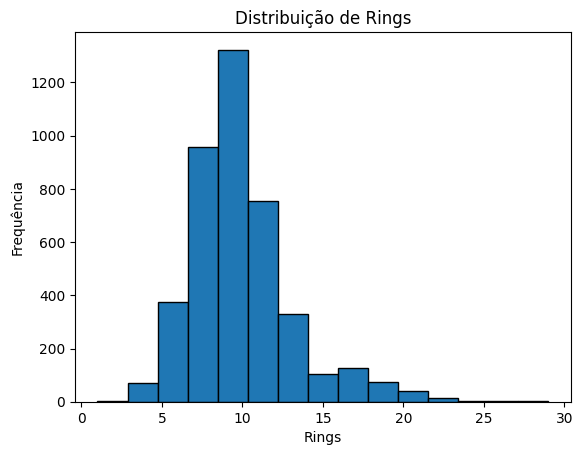

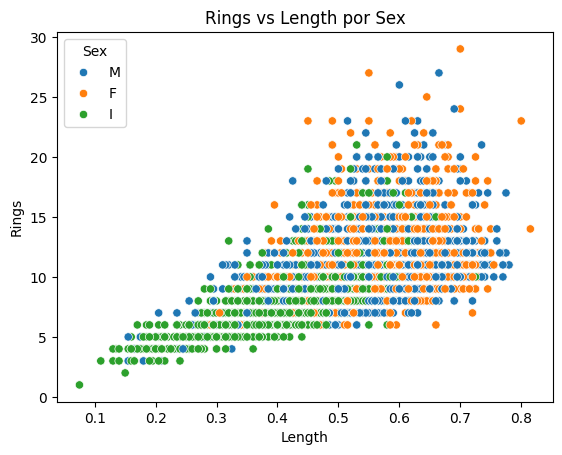

In [51]:
# Histograma de Rings (idade aproximada)
plt.hist(df['Rings'], bins=15, edgecolor='k')
plt.title('Distribuição de Rings')
plt.xlabel('Rings')
plt.ylabel('Frequência')
plt.show()

# Dispersão entre Length e Rings, com cor por sexo
sns.scatterplot(x='Length', y='Rings', hue='Sex', data=df)
plt.title('Rings vs Length por Sex')
plt.show()


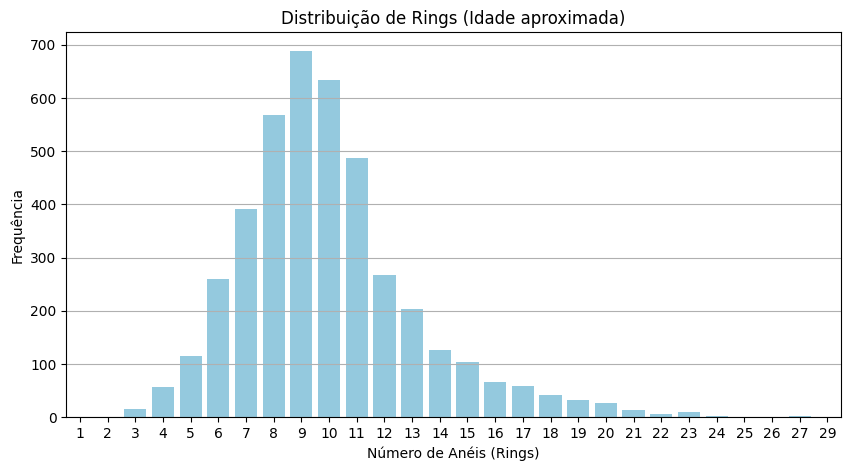

In [41]:
# Mesmo contador, mas fixando a ordem no parâmetro order
rings_counts = df['Rings'].astype(int).value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=rings_counts.index.astype(int),
            y=rings_counts.values,
            order=rings_counts.index.tolist(),   # força a ordem numérica
            color='skyblue')
plt.title('Distribuição de Rings (Idade aproximada)')
plt.xlabel('Número de Anéis (Rings)')
plt.ylabel('Frequência')
plt.grid(axis='y')
plt.show()


Matriz de Correlação (Heatmap)

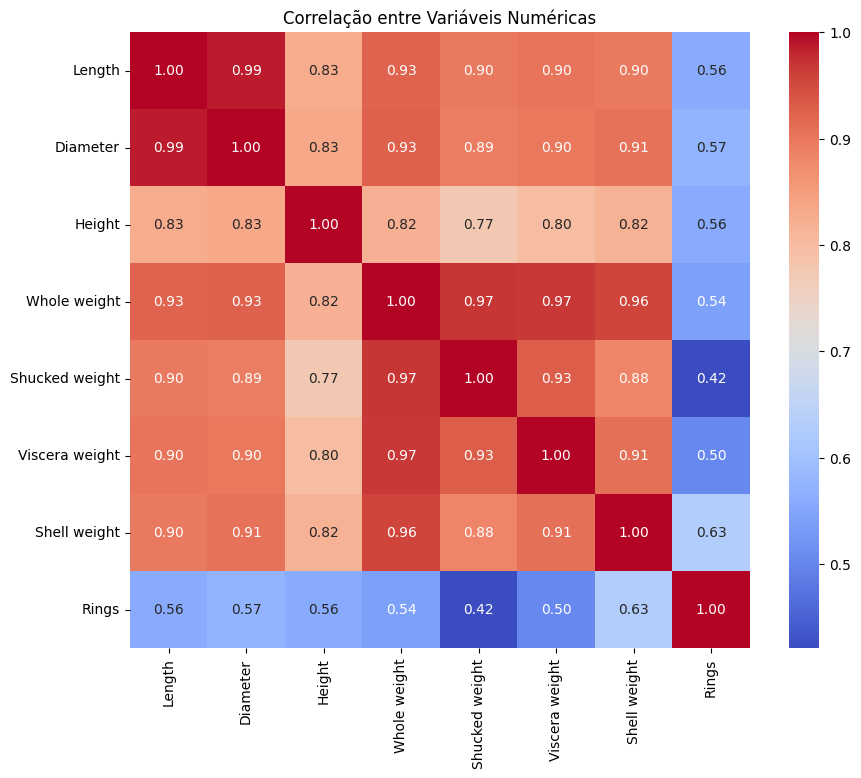

In [53]:
# Matriz de Correlação (Heatmap)
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre Variáveis Numéricas')
plt.show()


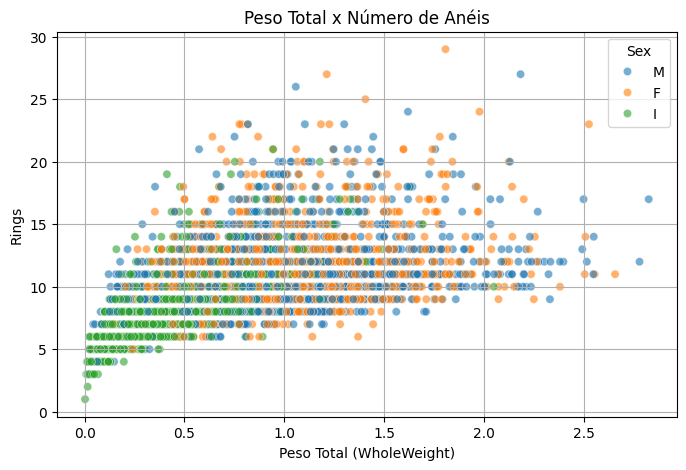

In [56]:
# Scatterplot: Peso Total vs Anéis (idade)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Whole weight', y='Rings', data=df, hue='Sex', alpha=0.6)
plt.title('Peso Total x Número de Anéis')
plt.xlabel('Peso Total (WholeWeight)')
plt.ylabel('Rings')
plt.grid(True)
plt.show()


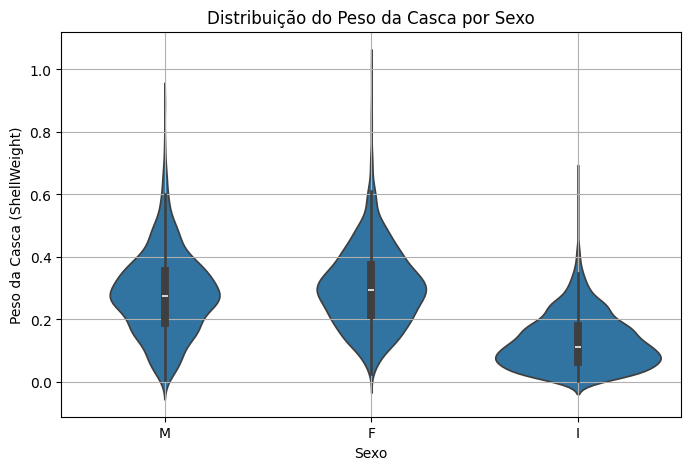

In [58]:
# Violinplot: Peso da Casca por Sexo
plt.figure(figsize=(8, 5))
sns.violinplot(x='Sex', y='Shell weight', data=df, inner='box')
plt.title('Distribuição do Peso da Casca por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Peso da Casca (ShellWeight)')
plt.grid(True)
plt.show()


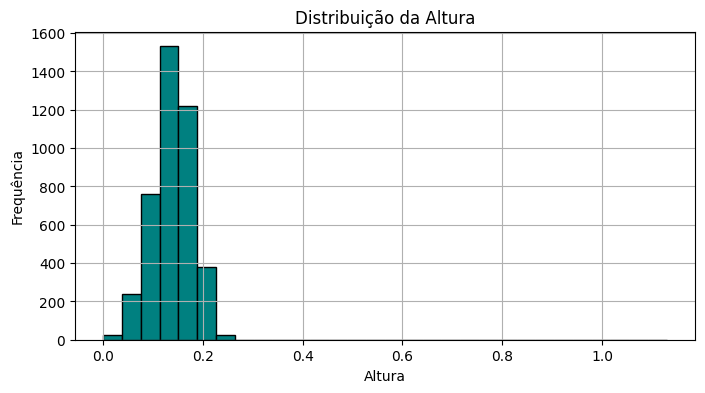

In [59]:
# Histograma de Altura
plt.figure(figsize=(8, 4))
plt.hist(df['Height'], bins=30, color='teal', edgecolor='black')
plt.title('Distribuição da Altura')
plt.xlabel('Altura')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


#2. Desenvolvimento do Modelo de Regressão


In [65]:
#Converte a categoria Sex em colunas binárias,
df_encoded = pd.get_dummies(df, columns=['Sex'], drop_first=True)
print(df_encoded.columns.tolist())


['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings', 'Sex_I', 'Sex_M']


In [61]:
#Separa preditores (X) e alvo (y),
X = df_encoded.drop('Rings', axis=1)
y = df_encoded['Rings']
print(X.shape, y.shape)


(4177, 9) (4177,)


In [67]:
#Prepara (instancia) o modelo de regressão linear para ser treinado na etapa seguinte
from sklearn.linear_model import LinearRegression
model = LinearRegression()


#3. Treinamento e Avaliação do Modelo


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(X_train.shape, X_test.shape)


(3341, 9) (836, 9)


In [69]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [70]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R^2: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")


R^2: 0.548
RMSE: 2.212


R² (coeficiente de determinação) = 0,548
→ o modelo consegue explicar cerca de 54,8% da variância no número de anéis (Rings) com base nas variáveis físicas do abalone (peso, tamanho, sexo etc.).

RMSE (Root Mean Square Error) = 2,212
→ em média, o erro do modelo é de aproximadamente 2,2 anéis. Como a idade real é Rings + 1.5, isso equivale a um erro de idade de ~2,2 anos.